In [2]:
import pandas as pd
import numpy as np

In [3]:
df_BTC = pd.read_csv('/content/drive/MyDrive/MASTER DATA SCIECE/M0. Capstone/Aaron/BTCUSDT.csv', sep=',', index_col=[0])

In [4]:
df_BTC.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote assert volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2020-01-01 00:00:00,7195.24,7196.25,7178.64,7179.78,95.509133,2020-01-01 00:04:59.999,686317.136252,1127,32.773245,235537.295045,0
1,2020-01-01 00:05:00,7179.76,7191.77,7178.20,7191.07,59.365225,2020-01-01 00:09:59.999,426481.260364,631,24.766513,177935.618201,0
2,2020-01-01 00:10:00,7193.15,7193.53,7180.24,7180.97,48.068510,2020-01-01 00:14:59.999,345446.503019,694,19.422283,139596.621683,0
3,2020-01-01 00:15:00,7180.97,7186.40,7177.35,7178.29,32.192929,2020-01-01 00:19:59.999,231162.555424,576,12.963258,93091.433276,0
4,2020-01-01 00:20:00,7177.71,7182.46,7175.47,7176.96,49.027397,2020-01-01 00:24:59.999,351927.893881,710,22.819744,163817.881155,0


In [5]:
df_BTC.isnull().sum()

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote assert volume             0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

In [6]:
df_BTC.Close.dtype

dtype('float64')

In [7]:
df_muestra = df_BTC.iloc[:150000]

In [8]:
### Miramos si el p-value es stationary or not. 0.05 less IT IS. more IS NOT

from statsmodels.tsa.stattools import adfuller

result = adfuller(df_muestra['Close'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.7960079707998877
p-value: 0.8202918843628629
Critial Values:
   1%, -3.4303936132342336
Critial Values:
   5%, -2.8615592764369957
Critial Values:
   10%, -2.5667802601605567


In [9]:
from numpy import log

result = adfuller(log(df_muestra['Close'].values), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

### close price is still Non-stationary

ADF Statistic: -0.6271282192836141
p-value: 0.8647335917292256
Critial Values:
   1%, -3.430393618179657
Critial Values:
   5%, -2.8615592786227873
Critial Values:
   10%, -2.5667802613239785


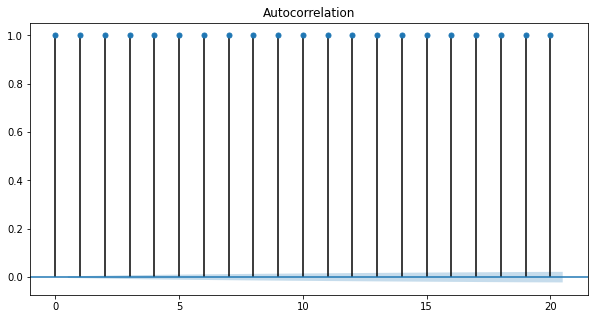

In [10]:
### Autocorrelation Function (ACF1)

# Autocorrelation is the correlation between a time series with a lagged version of itself.
# The ACF starts at a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.
# The ACF plot can provide answers to the following questions:

# Is the observed time series white noise/random?
# Is an observation related to an adjacent observation, an observation twice-removed, and so on?
# Can the observed time series be modeled with an MA model? If yes, what is the order?

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(10,5))
plot_acf(log(df_BTC['Close'].values), lags = 20)
print()

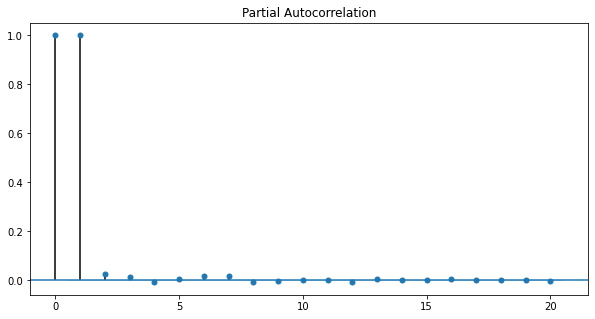

In [11]:
###The PACF plot can provide answers to the following question:

# Can the observed time series be modeled with an AR model? If yes, what is the order?
# Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.
# The difference between ACF and PACF is the inclusion or exclusion of indirect correlations in the calculation.
# Additionally, you can see a blue area in the ACF and PACF plots.
# This blue area depicts the 95% confidence interval and is an indicator of the significance threshold.
# That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

plt.rc("figure", figsize=(10,5))
plot_pacf(log(df_BTC['Close'].values), lags=20)
print()

In [12]:
### Univariable Forecast

### Separamos data nose yo si es muy correcto separar así. SUpongo que deja un 20% para validación


data = df_BTC['Close'].values
print('Shape of data: ', data.shape)

train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Shape of data:  (311743,)
Train length:  249394
Shape of Train and Test data:  249394 62349


In [13]:
### Separamos la data en X e y para poder enmtrenar

from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [14]:
### lag es para saber la correlacion que tiene la time series sobre ella misma. PREGUNTAR

lag = 3  # Empirically we have choosen
n_features = 1

train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (249391, 3) (249391,)
Shape of test_X and test_y:  (62346, 3) (62346,)


In [15]:
### Pasamos nuestra data a dimension R3. Supongo que es un tema de redes neuronales

train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (249391, 3, 1) (249391,)
Shape of test_X and test_y:  (62346, 3, 1) (62346,)


In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(LSTM(512, activation='relu', return_sequences=True, input_shape=(lag, n_features)))
model.add(LSTM(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 512)            1052672   
                                                                 
 lstm_1 (LSTM)               (None, 512)               2099200   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 3,152,385
Trainable params: 3,152,385
Non-trainable params: 0
_________________________________________________________________


In [18]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [21]:
history = model.fit(train_X, train_y, epochs = 10, batch_size = 356, verbose = 1, validation_split =  0.1)

Epoch 1/10
631/631 [==============================] - 413s 655ms/step - loss: 324207.0312 - val_loss: 13313.8594
Epoch 2/10
631/631 [==============================] - 397s 628ms/step - loss: 30444.3906 - val_loss: 13463.7109
Epoch 3/10
631/631 [==============================] - 404s 641ms/step - loss: 22750.3438 - val_loss: 16049.9287
Epoch 4/10
631/631 [==============================] - 413s 655ms/step - loss: 17601.4180 - val_loss: 13484.2070
Epoch 5/10
631/631 [==============================] - 406s 644ms/step - loss: 17598.8359 - val_loss: 14828.1543
Epoch 6/10
631/631 [==============================] - 407s 646ms/step - loss: 19349.4570 - val_loss: 13440.6504
Epoch 7/10
631/631 [==============================] - 402s 637ms/step - loss: 19683.2109 - val_loss: 17729.1758
Epoch 8/10
631/631 [==============================] - 397s 630ms/step - loss: 22457.6133 - val_loss: 14253.8818
Epoch 9/10
631/631 [==============================] - 396s 627ms/step - loss: 32036.3613 - val_loss: 15

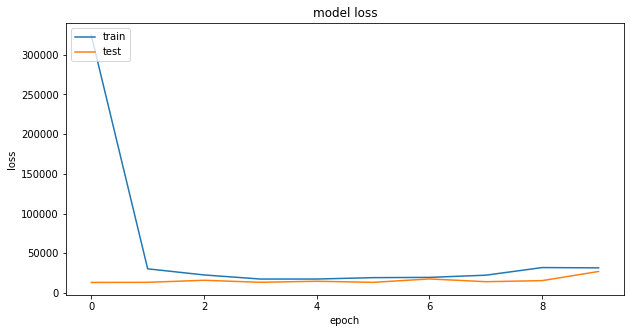

In [22]:
### Vemos el acoplamiento del train and test

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

1949/1949 [==============================] - 100s 52ms/step
Shape of train and test predict:  (249391, 1) (62346, 1)


In [24]:
### Evaluamos las metricas de error RMSE

import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(train_y, train_predict)
test_score = measure_rmse(test_y, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  166.56368444095196 86.94051427605827


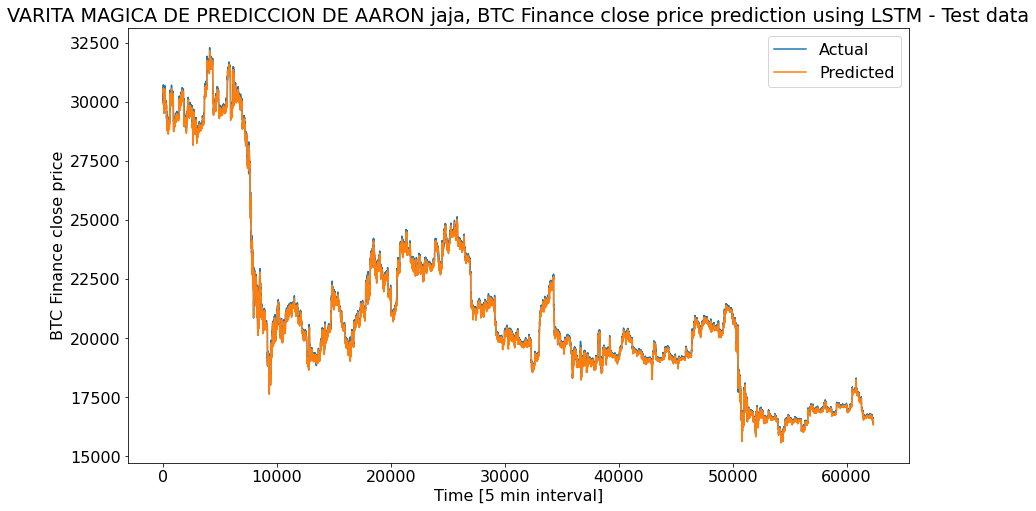

In [25]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(test_y, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.xlabel('Time [5 min interval]')
plt.ylabel('BTC Finance close price')
plt.title('VARITA MAGICA DE PREDICCION DE AARON jaja, BTC Finance close price prediction using LSTM - Test data')
plt.legend()
plt.show()

In [26]:

from pickle import dump 
dump(history, open('/content/drive/MyDrive/MASTER DATA SCIECE/M0. Capstone/Aaron/Trading_Algoritmico-BTC/RNR_TS.pkl', 'wb'))